In [1130]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

In [1131]:
df = pd.read_csv('pl_22_23.csv', encoding='utf-8')
df_22 = pd.read_csv('pl_23_24.csv', encoding='utf-8')
df_22_24 = pd.concat([df, df_22])

In [1132]:
df

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,05/08/2022,20:00,Crystal Palace,Arsenal,0,2,A,0,1,...,1.76,0.50,2.09,1.84,2.04,1.88,2.09,1.88,2.03,1.85
1,E0,06/08/2022,12:30,Fulham,Liverpool,2,2,D,1,0,...,2.73,1.75,1.90,2.03,1.91,2.02,2.01,2.06,1.89,1.99
2,E0,06/08/2022,15:00,Bournemouth,Aston Villa,2,0,H,1,0,...,1.76,0.50,1.93,2.00,1.93,2.00,1.94,2.04,1.88,2.00
3,E0,06/08/2022,15:00,Leeds,Wolves,2,1,H,1,1,...,1.87,-0.25,2.08,1.85,2.10,1.84,2.14,1.87,2.08,1.81
4,E0,06/08/2022,15:00,Newcastle,Nott'm Forest,2,0,H,0,0,...,1.89,-1.00,1.97,1.96,1.99,1.93,2.19,1.97,2.03,1.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,28/05/2023,16:30,Everton,Bournemouth,1,0,H,0,0,...,2.14,-1.00,2.02,1.77,2.10,1.81,2.17,1.92,2.03,1.83
376,E0,28/05/2023,16:30,Leeds,Tottenham,1,4,A,0,1,...,2.50,0.25,1.84,2.06,1.83,2.10,1.90,2.14,1.81,2.06
377,E0,28/05/2023,16:30,Leicester,West Ham,2,1,H,1,0,...,2.51,-0.25,1.75,2.05,1.85,2.06,1.90,2.16,1.82,2.04
378,E0,28/05/2023,16:30,Man United,Fulham,2,1,H,1,1,...,2.95,-1.25,1.98,1.92,1.98,1.93,2.07,1.98,1.97,1.89


In [1133]:
df_22

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,11/08/2023,20:00,Burnley,Man City,0,3,A,0,2,...,2.28,1.50,1.95,1.98,1.95,1.97,NaN,NaN,1.92,1.95
1,E0,12/08/2023,12:30,Arsenal,Nott'm Forest,2,1,H,2,0,...,2.63,-2.00,1.95,1.98,1.93,1.97,2.01,2.09,1.95,1.92
2,E0,12/08/2023,15:00,Bournemouth,West Ham,1,1,D,0,0,...,2.12,0.00,2.02,1.91,2.01,1.92,2.06,1.96,1.96,1.91
3,E0,12/08/2023,15:00,Brighton,Luton,4,1,H,1,0,...,2.48,-1.75,2.01,1.92,2.00,1.91,2.14,1.93,2.00,1.86
4,E0,12/08/2023,15:00,Everton,Fulham,0,1,A,0,0,...,1.71,-0.25,2.06,1.87,2.04,1.88,2.08,1.99,1.98,1.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,E0,30/12/2023,17:30,Nott'm Forest,Man United,2,1,H,0,0,...,2.14,0.25,1.99,1.94,2.00,1.93,2.09,1.94,1.97,1.89
194,E0,31/12/2023,14:00,Fulham,Arsenal,2,1,H,1,1,...,2.04,1.00,1.89,2.04,1.87,2.06,2.02,2.07,1.89,1.98
195,E0,31/12/2023,14:00,Tottenham,Bournemouth,3,1,H,1,0,...,3.41,-0.75,1.98,1.95,2.00,1.93,2.00,2.00,1.93,1.93
196,E0,01/01/2024,20:00,Liverpool,Newcastle,4,2,H,0,0,...,3.12,-1.50,2.01,1.92,1.98,1.93,2.14,1.94,2.01,1.87


In [1134]:
df_22_24

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,05/08/2022,20:00,Crystal Palace,Arsenal,0,2,A,0,1,...,1.76,0.50,2.09,1.84,2.04,1.88,2.09,1.88,2.03,1.85
1,E0,06/08/2022,12:30,Fulham,Liverpool,2,2,D,1,0,...,2.73,1.75,1.90,2.03,1.91,2.02,2.01,2.06,1.89,1.99
2,E0,06/08/2022,15:00,Bournemouth,Aston Villa,2,0,H,1,0,...,1.76,0.50,1.93,2.00,1.93,2.00,1.94,2.04,1.88,2.00
3,E0,06/08/2022,15:00,Leeds,Wolves,2,1,H,1,1,...,1.87,-0.25,2.08,1.85,2.10,1.84,2.14,1.87,2.08,1.81
4,E0,06/08/2022,15:00,Newcastle,Nott'm Forest,2,0,H,0,0,...,1.89,-1.00,1.97,1.96,1.99,1.93,2.19,1.97,2.03,1.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,E0,30/12/2023,17:30,Nott'm Forest,Man United,2,1,H,0,0,...,2.14,0.25,1.99,1.94,2.00,1.93,2.09,1.94,1.97,1.89
194,E0,31/12/2023,14:00,Fulham,Arsenal,2,1,H,1,1,...,2.04,1.00,1.89,2.04,1.87,2.06,2.02,2.07,1.89,1.98
195,E0,31/12/2023,14:00,Tottenham,Bournemouth,3,1,H,1,0,...,3.41,-0.75,1.98,1.95,2.00,1.93,2.00,2.00,1.93,1.93
196,E0,01/01/2024,20:00,Liverpool,Newcastle,4,2,H,0,0,...,3.12,-1.50,2.01,1.92,1.98,1.93,2.14,1.94,2.01,1.87


In [1135]:
df_22_24['HomeTeam'].value_counts()

HomeTeam
Crystal Palace      29
Aston Villa         29
Liverpool           29
Chelsea             29
Nott'm Forest       29
Brentford           29
Wolves              29
Brighton            29
Fulham              29
Arsenal             29
West Ham            29
Man United          29
Everton             29
Tottenham           29
Newcastle           29
Man City            28
Bournemouth         28
Leicester           19
Southampton         19
Leeds               19
Burnley             10
Sheffield United    10
Luton               10
Name: count, dtype: int64

In [1136]:
df_22_24.shape

(578, 106)

In [1137]:
df_22_24.dtypes

Div          object
Date         object
Time         object
HomeTeam     object
AwayTeam     object
             ...   
PCAHA       float64
MaxCAHH     float64
MaxCAHA     float64
AvgCAHH     float64
AvgCAHA     float64
Length: 106, dtype: object

In [1138]:
df_22_24.Date = pd.to_datetime(df_22_24['Date'], dayfirst=True)

In [1139]:
df_22_24['Day_code'] = df_22_24['Date'].dt.dayofweek
df_22_24.Day_code

0      4
1      5
2      5
3      5
4      5
      ..
193    5
194    6
195    6
196    0
197    1
Name: Day_code, Length: 578, dtype: int32

In [1140]:
df_22_24['Time_code'] = df_22_24['Time'].apply(lambda x: x[:2]).astype('int64')

In [1141]:
df_22_24.Time_code

0      20
1      12
2      15
3      15
4      15
       ..
193    17
194    14
195    14
196    20
197    19
Name: Time_code, Length: 578, dtype: int64

In [1142]:
encoder = LabelEncoder()
df_22_24['H_Team_code'] = encoder.fit_transform(df_22_24.HomeTeam)
df_22_24['A_Team_code'] = encoder.fit_transform(df_22_24.AwayTeam)
df_22_24[['HomeTeam','H_Team_code']].sort_values('H_Team_code', ascending=False)

,HomeTeam,H_Team_code
154,Wolves,22
56,Wolves,22
227,Wolves,22
13,Wolves,22
110,Wolves,22
...,...,...
84,Arsenal,0
67,Arsenal,0
306,Arsenal,0
165,Arsenal,0


In [1143]:
df_22_24[['HomeTeam','H_Team_code']].groupby(['HomeTeam','H_Team_code']).count()

,
HomeTeam,H_Team_code
Arsenal,0
Aston Villa,1
Bournemouth,2
Brentford,3
Brighton,4
Burnley,5
Chelsea,6
Crystal Palace,7
Everton,8


In [1144]:
df_22_24['Win'] = np.where(df_22_24.FTR == 'H', 1, 0)
df_22_24.Win.head(3)

0    0
1    0
2    1
Name: Win, dtype: int32

In [1145]:
df_22_24['Goals'] = df_22_24.FTHG + df_22_24.FTAG

In [1146]:
df_22_24.Goals.unique()

array([2, 4, 3, 5, 1, 6, 0, 9, 7, 8], dtype=int64)

`Making some predictors and the the outcome we would like to predict`

In [1147]:
features = ['Day_code', 'Time_code', 'H_Team_code', 'A_Team_code', 'Win']

In [1148]:
df_22_24.Date

0     2022-08-05
1     2022-08-06
2     2022-08-06
3     2022-08-06
4     2022-08-06
         ...    
193   2023-12-30
194   2023-12-31
195   2023-12-31
196   2024-01-01
197   2024-01-02
Name: Date, Length: 578, dtype: datetime64[ns]

In [1149]:
df_22_24[features]

,Day_code,Time_code,H_Team_code,A_Team_code,Win
0,4,20,7,0,0
1,5,12,9,12,0
2,5,15,2,1,1
3,5,15,10,22,1
4,5,15,16,17,1
...,...,...,...,...,...
193,5,17,17,15,1
194,6,14,9,0,1
195,6,14,20,2,1
196,0,20,12,16,1


In [1150]:
target = 'Win'
X = df_22_24[features].drop(target, axis=1)
y = df_22_24[target]

In [1151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

In [1152]:
X_train.head(2)

,Day_code,Time_code,H_Team_code,A_Team_code
248,6,14,17,8
275,5,15,17,22


In [1153]:
y_train

248    0
275    0
68     0
89     1
63     0
      ..
71     0
106    1
270    1
55     1
102    1
Name: Win, Length: 462, dtype: int32

In [1154]:
'''X = df_22_24[features[:-1]]
X'''

'X = df_22_24[features[:-1]]\nX'

In [1155]:
'''X_train, X_test, y_train, y_test = train[features[:-1]], test[features[:-1]], train[features[-1]], test[features[-1]]
X_train'''

'X_train, X_test, y_train, y_test = train[features[:-1]], test[features[:-1]], train[features[-1]], test[features[-1]]\nX_train'

In [1156]:
scaler = StandardScaler()
scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=15)
model_log = LogisticRegression()
model_log.fit(X_train, y_train)
y_pred = model_log.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy is {accuracy}')

Accuracy is 0.5603448275862069


In [1157]:
threshold = 0.5
y_pred_proba = model_log.predict_proba(X_test)[:, 1]
y_pred = np.where(y_pred_proba > threshold, 1, 0)
y_test = np.array(y_test)
y_test[:5], y_pred[:5]

(array([0, 0, 1, 1, 0]), array([0, 0, 0, 1, 0]))

In [1158]:
true_positives = 0
true_negatives = 0
false_positives = 0
false_negatives = 0

for i in range(len(y_test)):
  if y_test[i] == 1 and y_pred[i] == 1:
    true_positives += 1
  elif y_test[i] == 0 and y_pred[i] == 0:
    true_negatives += 1
  elif y_test[i] == 0 and y_pred[i] == 1:
    false_positives += 1
  else:
    false_negatives +=1
    
print(true_positives, true_negatives, false_positives, false_negatives)
print(confusion_matrix(y_test, y_pred))
print((true_positives+true_negatives)/(true_negatives+true_positives+false_negatives+false_positives))

21 44 13 38
[[44 13]
 [38 21]]
0.5603448275862069


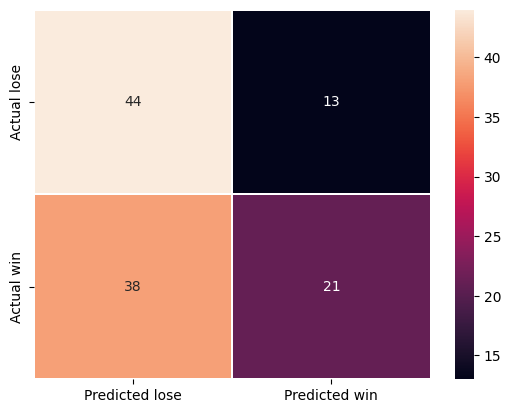

<Figure size 640x480 with 0 Axes>

In [1159]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, linecolor='white', linewidths=.1,
            xticklabels=['Predicted lose', 'Predicted win'],
            yticklabels=['Actual lose', 'Actual win'])
plt.show()
plt.clf()

In [1160]:
np.random.seed(42)
accuracy_train=[]
accuracy_test = []
depths = range(1,20)
for depth in depths:
  model = RandomForestClassifier(max_depth=depth)
  model.fit(X_train.values, y_train)
  y_pred_train = model.predict(X_train.values)
  y_pred_test = model.predict(X_test.values)
  accuracy_train.append(accuracy_score(y_train, y_pred_train))
  accuracy_test.append(accuracy_score(y_test, y_pred_test))
best_acc = np.max(accuracy_test)
best_depth = depths[np.argmax(accuracy_test)]
print('Best accuracy with using Randomforest is: ', best_acc, ' and the best depth is: ', best_depth)

Best accuracy with using Randomforest is:  0.646551724137931  and the best depth is:  3


In [1161]:
X_test.head(2)

,Day_code,Time_code,H_Team_code,A_Team_code
323,3,20,20,15
226,5,15,17,14


In [1162]:
test_one = np.array([5, 12, 0, 7])
test_one = test_one.reshape(1, -1)
test_one

array([[ 5, 12,  0,  7]])

In [1163]:
test_preds = model.predict(test_one)
test_preds

array([1])

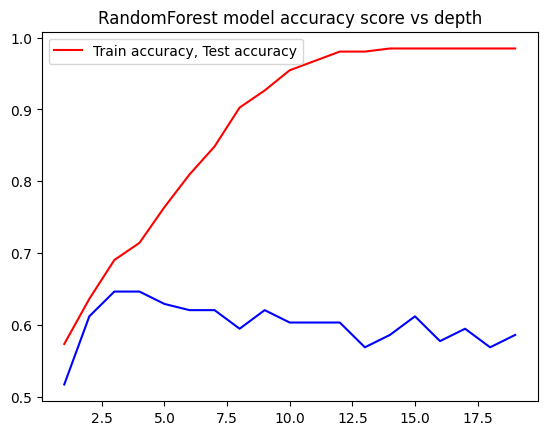

In [1164]:
plt.plot(depths, accuracy_train, 'r', depths, accuracy_test, 'b')
plt.title('RandomForest model accuracy score vs depth')
plt.legend(['Train accuracy, Test accuracy'])
plt.show()

`Predicting the number of Goals full time`

In [1165]:
linear_model = LinearRegression()

In [1166]:
new_features = features[:-1]

In [1167]:
new_features.extend(['FTHG', 'FTAG', 'Goals'])
new_features

['Day_code',
 'Time_code',
 'H_Team_code',
 'A_Team_code',
 'FTHG',
 'FTAG',
 'Goals']

In [1168]:
target = 'Goals'
X = df_22_24[new_features].drop(target, axis=1)
y = np.array(df_22_24[target])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=20)
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

In [1169]:
print(f'Accuracy: {r2_score(y_test, y_pred)}')

Accuracy: 1.0
